# Twitter Sentiment Analysis

Datasets source: https://www.kaggle.com/datasets/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# Importing libraries

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Importing & Inspecting data

In [2]:
df = pd.read_csv('D://Projects/Sentiment Analysis/Data/train.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df['id'].nunique()

31962

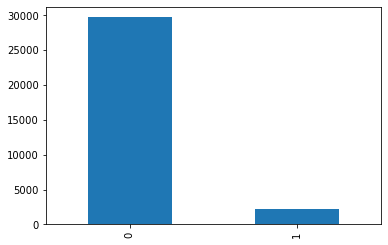

In [5]:
df['label'].value_counts().plot(kind='bar');

# Cleaning data

In [6]:
ps = PorterStemmer()

In [7]:
corpus = []
for i in range(len(df)):
    s = re.sub('[^a-zA-Z]',' ',df['tweet'][i])
    s = s = s.lower()
    s = s.split()
    s = [word for word in s if word not in stopwords.words('english')]
    s = ' '.join(s)
    s = ps.stem(s)
    corpus.append(s)

# Splitting data

In [8]:
X = corpus

In [9]:
y = df['label']

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train).toarray()
X_val = cv.transform(X_val).toarray()

# Training model

In [12]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

In [13]:
print('confusion matrx: ',confusion_matrix(y_val,y_pred))
print('accuracy score: ',accuracy_score(y_val,y_pred))
print('classification report: ',classification_report(y_val,y_pred))

confusion matrx:  [[5903   34]
 [ 229  227]]
accuracy score:  0.9588612544971062
classification report:                precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.87      0.50      0.63       456

    accuracy                           0.96      6393
   macro avg       0.92      0.75      0.81      6393
weighted avg       0.96      0.96      0.95      6393



# Prediction

In [14]:
def test(path_df):
    test_df = pd.read_csv(path_df)
    corpus = []
    for i in range(len(test_df)):
        s = re.sub('[^a-zA-Z]',' ',test_df['tweet'][i])
        s = s = s.lower()
        s = s.split()
        s = [word for word in s if word not in stopwords.words('english')]
        s = ' '.join(s)
        s = ps.stem(s)
        corpus.append(s)
    test_df = cv.transform(corpus).toarray()
    pred = clf.predict(test_df)
    return pred

In [15]:
prediction = test('D://Projects/Sentiment Analysis/Data/test.csv')

In [16]:
df1 = pd.read_csv('D://Projects/Sentiment Analysis/Data/test.csv')

In [17]:
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
df1['prediction'] = prediction

In [19]:
df1.head()

,id,tweet,prediction
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
